In [1]:
from IPython.core.display import HTML
with open('../style.css', 'r') as file:
    style = file.read()
HTML(style)

In [2]:
import torch
import time

The *Metal performance Shader* will only show a speedup for large matrices.

In [3]:
size = 1000

Create two random square matrices with `size`rows and columns.

In [4]:
A = torch.randn(size, size)
B = torch.randn(size, size)

CPU Matrix Multiplication

In [5]:
def matrix_mul_cpu(A, B):
    start_time = time.time()
    result = torch.matmul(A, B)
    end_time = time.time()
    return end_time - start_time

MPS Matrix Multiplication

In [6]:
def matrix_mul_mps(A, B):
    device = torch.device('mps')
    start_time = time.time()
    result = torch.matmul(A.to(device), B.to(device))
    end_time = time.time()
    return end_time - start_time

In [7]:
def speedup(size):
    A = torch.randn(size, size)
    B = torch.randn(size, size)
    cpu_time = 0.0
    mps_time = 0.0
    for k in range(10):
        cpu_time += matrix_mul_cpu(A, B)
        mps_time += matrix_mul_mps(A, B)
    return cpu_time / mps_time

In [8]:
speedup(1000)

0.15147804937103113

In [9]:
import matplotlib.pyplot as plt
import numpy as np

The function `plot` plots the function `f` over a range of natural numbers.
* `f` the function to be plotted
* `start`: The starting natural number.
* `end`: The ending natural number (inclusive).

In [10]:
def plot(f, start, end):
    n_values = np.arange(start, end + 1, 1000)  # Array of natural numbers
    f_values = []
    for n in n_values:       # Calculate f(n) for each value
        f_val = f(n)
        print(f'size = {n:5d}: speedup: {f_val:5.2f}')
        f_values.append(f_val)
    plt.plot(n_values, f_values)
    plt.xlabel("n")
    plt.ylabel("speedup")
    plt.title("Plot of speedup w.r.t. to matrix size.")
    plt.grid(True)
    plt.show()

size =  1000: speedup:  0.66
size =  2000: speedup:  0.70
size =  3000: speedup:  1.57
size =  4000: speedup:  1.84
size =  5000: speedup:  1.79
size =  6000: speedup: 11.02
size =  7000: speedup: 15.64
size =  8000: speedup: 17.14
size =  9000: speedup: 21.09
size = 10000: speedup: 23.68
size = 11000: speedup: 26.72
size = 12000: speedup: 31.64
size = 13000: speedup: 36.78
size = 14000: speedup: 34.10
size = 15000: speedup: 40.44
size = 16000: speedup: 26.81
size = 17000: speedup: 26.30
size = 18000: speedup: 25.12
size = 19000: speedup: 27.32
size = 20000: speedup: 36.99


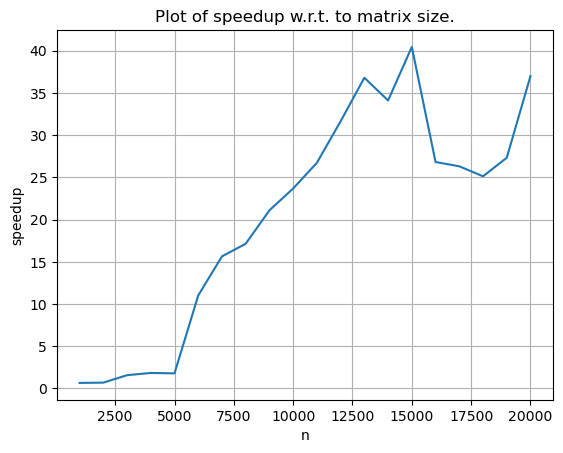

In [11]:
plot(speedup, 1000, 20000)